# **Getting data & Visualization**

In [1]:
#Importing libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gensim.downloader as api
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
from gensim.models import Word2Vec,KeyedVectors
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#Loading the english library
nlp = spacy.load("en_core_web_sm")

In [4]:
#Filtering warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the word2vec model
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
#Getting the data

df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip',encoding = 'utf-8',delimiter = None)
df.sample(5)

,review,sentiment
18222,I liked this movies. Its a another Yash raj fi...,positive
11353,"Freddy's Dead: The Final Nightmare, the sixth ...",negative
13801,This movie was terrible. It is not something t...,negative
23626,"An excellent ""sleeper"" of a movie about the se...",positive
19721,Highly recommended!!<br /><br />A well written...,positive


In [8]:
#Knowing the size of the dataset
df.shape

(50000, 2)

In [9]:
#Checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
#Checking for duplicate values
df.duplicated().sum()

418

In [11]:
#Dropping the duplicates
df = df.drop_duplicates()
df.shape

(49582, 2)

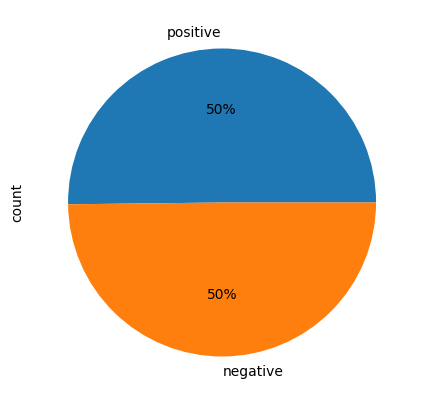

In [12]:
#Visualizing the target column to see if the dataset is imbalanced or not
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5),)
plt.show()

# **Preprocessing**

In [13]:
#Transforming our target column
def sentiment_to_num(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return 0

df['sentiment_num'] = df['sentiment'].apply(sentiment_to_num)
df.drop('sentiment', axis=1, inplace=True)
df.sample(5)

,review,sentiment_num
29704,"1983 was ""the battle of the Bonds"". That year ...",1
19638,"Well, not yet, at least.<br /><br />It's not l...",0
44066,"Drifting around on bootlegs, sometimes thought...",0
42908,I understand that the budget was low on this f...,0
362,This is a very memorable spaghetti western. It...,1


In [14]:
#Extracting number of sentences in each review
df['num_sentence'] = df['review'].apply(lambda x: len(x.split('.')))
df.sample(5)

,review,sentiment_num,num_sentence
31030,I rented this film in DVD form without knowing...,1,12
21497,So first things first..<br /><br />Angels and ...,1,17
25199,i honestly dont know why so many people hate t...,1,7
23115,This short film (and the poem which is behind ...,1,5
22029,I watched this movie tonight and I do need to ...,0,3


In [15]:
#Extracting number of words in each review
df['num_words'] = df['review'].apply(lambda x: len(x.split()))
df.sample(5)

,review,sentiment_num,num_sentence,num_words
16576,An original uncensored print of this amazing f...,1,5,119
22771,"Even after all these years, this remain ""a per...",1,9,144
46775,The book is so good that at least the opening ...,0,5,121
37114,This is one of the most putrid movies of the 9...,0,27,482
33635,Occasionally one is served a new entrée from f...,0,18,233


In [16]:
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing1(text):
    text = re.sub('<[^>]*>', ' ', text)              #Removing html tags
    emojis = emoji_pattern.findall(text)            #Finding emojis
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')
    return text

df['review'] = df['review'].apply(preprocessing1)
df.sample(5)

,review,sentiment_num,num_sentence,num_words
33840,i thought this movie was pretty good some par...,1,7,90
3184,what happened to these unlikeable people a...,0,7,86
19840,i stumbled upon nine dead recently and read th...,0,11,169
38909,while rome goes mad celebrating hitler s visit...,1,11,163
29523,i caught this film at the edinburgh film festi...,0,17,373


In [17]:
#Removing stopwords
def preprocessing2(text):
  new_text = []
  for word in text.split():
    if word not in stopwords.words('english'):
      new_text.append(word)
  return ' '.join(new_text)

df['review'] = df['review'].apply(preprocessing2)
df.sample(5)

,review,sentiment_num,num_sentence,num_words
22162,new york love full love power everybody howeve...,1,10,142
2435,best films watched nowadays read lot reviews s...,0,12,134
32328,30 years still remember movie worst ever seen ...,0,4,61
26999,shadows fog surely one woody allen weakest fil...,0,13,102
10030,first nature movie beautiful bit mongolian mus...,0,25,499


In [18]:
#Lemmatization and Vectorization
def preprocessing3(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
      filtered_tokens.append(token.lemma_)
    return wv.get_mean_vector(filtered_tokens)
df['vector'] = df['review'].apply(lambda text: preprocessing3(text))
df.sample(5)

,review,sentiment_num,num_sentence,num_words,vector
39104,saw wonderful world disney kid recall much wat...,1,8,116,"[0.028765708, 0.022921102, 0.0007419447, 0.049..."
8119,almost word go film poor lacking conviction pe...,0,13,227,"[0.022517571, 0.011171206, 0.0024084547, 0.057..."
47468,every generation fully believes living end tim...,0,10,132,"[0.028931914, 0.011792737, 0.005863735, 0.0514..."
41620,bore right mind crater lake monster one classi...,0,16,217,"[0.020280784, 0.014946421, -0.000666288, 0.041..."
9406,french cinema always strong comes time present...,1,6,60,"[0.004636434, 0.006795685, 0.0073610535, 0.062..."


In [19]:
#Dividing our dataset into input and ouput
X = df['vector'].apply(pd.Series) # Expand 'vector' into separate columns
X = pd.concat([X, df['num_words'],df['num_sentence']], axis=1) # Concatenate with 'num_words'
X = X.to_numpy()
y = df['sentiment_num']

In [20]:
#Splitting our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#Scaling our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# **Model Training**

0.8535798319327731


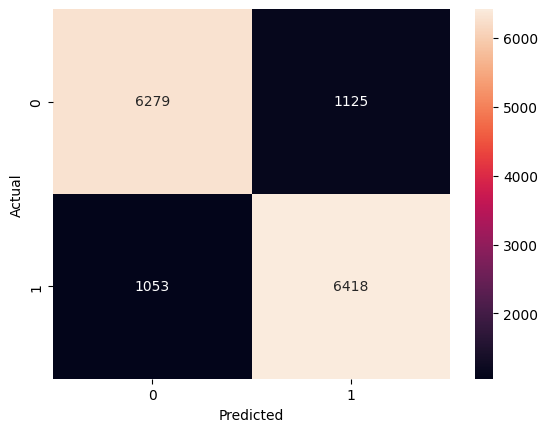

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7404
           1       0.85      0.86      0.85      7471

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



In [22]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

0.7649747899159663


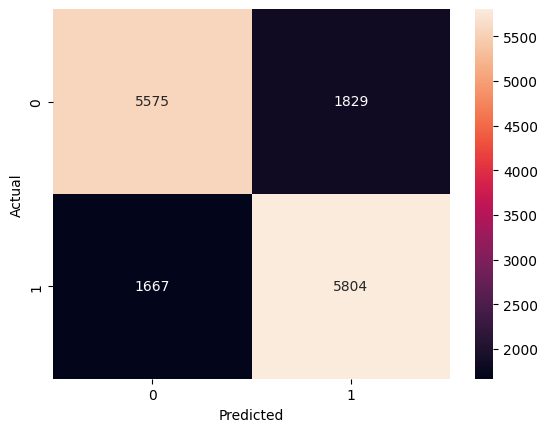

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7404
           1       0.76      0.78      0.77      7471

    accuracy                           0.76     14875
   macro avg       0.77      0.76      0.76     14875
weighted avg       0.77      0.76      0.76     14875



In [23]:
#Multinomial Naive-Bayes Model
from  sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)
y_pred = mnb.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

0.8067226890756303


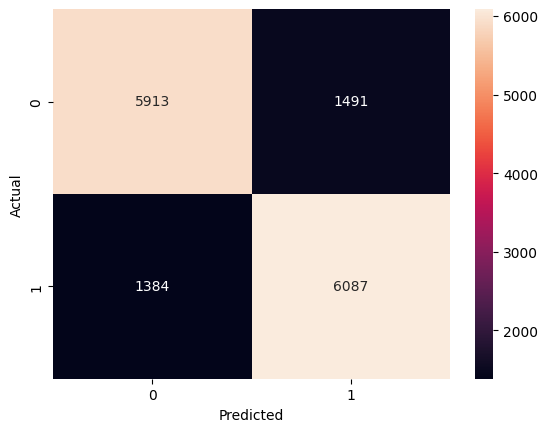

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      7404
           1       0.80      0.81      0.81      7471

    accuracy                           0.81     14875
   macro avg       0.81      0.81      0.81     14875
weighted avg       0.81      0.81      0.81     14875



In [24]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)
y_pred = rfc.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

0.8650756302521009


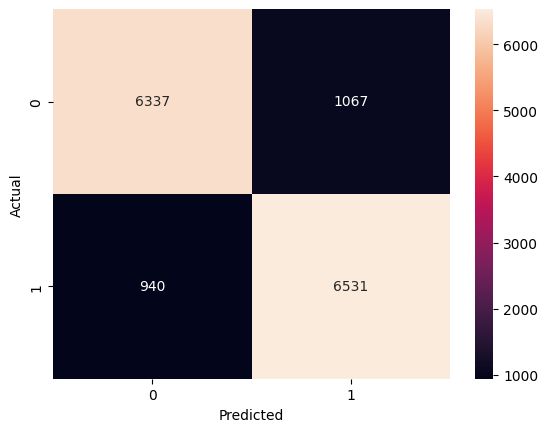

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7404
           1       0.86      0.87      0.87      7471

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875



In [25]:
#SVC model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)
y_pred = svc.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

**So we have got our best model as SVC with accuracy 87%**

In [137]:
#Prediction system
def user_input(comment):
    input=[]
    input.append(len(comment.split()))
    input.append(len(comment.split('.')))
    input=np.array(input)
    input_reshaped=input.reshape(1,-1)
    preprocessed_comment_1 = preprocessing1(comment)
    preprocessed_comment_2 = preprocessing2(preprocessed_comment_1)
    preprocessed_comment_3 = preprocessing3(preprocessed_comment_2)
    preprocessed_comment_3_reshaped = preprocessed_comment_3.reshape(1,-1)
    return np.hstack((input_reshaped,preprocessed_comment_3_reshaped))

comment = '''Awlright, damn it, the MooCow will grudgingly admit the truth: I kinda' like this cheap, cheesy 70's parody.
The idea that vast hordes of killer tomatoes are destroying the US is a great idea, and in spite of itself, the moovie does provide
some decent chuckles, moostly the sight of terrified extras running away from large, obviously fake tomatoes. This film, along with
The Kentucky Fried Moovie, is one of the earlier attempts at spoofs, which became so popular in the 80's & 90's, thanks largely to
Airplane!. This one, like moost spoofs, is pretty poor. Many attempts at humor are dismal failures, and will induce much groaning.
But thanks to the ravenous tomatoes hordes, the obnoxious "Puberty Love" song, and the awesome helicopter crash scene, Attack of
the Killer Tomatoes does provide some goods, though largely for the wrong reasons. There are sooooo many things wrong with this
film...and so right, it's hard to explain. Enough people must also have enjoyed it as the Tomatoes made a comeback in 2 moore
films, and a cartoon series!! Large chunks of time spent away from the tomatoes are pretty dull. And dig those 70's clothes,
dude!! ;=8) This tomato is seedy and cheesy, but worth a chuckle or two; the MooCow says grab a pizza and pop in the
Tomatoes!! :Â'''

to_predict = user_input(comment)
result = svc.predict(to_predict)[0]
if result == 1:
    print("Positive Sentiment")
else:
    print("Negative Sentiment")

Positive Sentiment
